In [1]:
#Import Packages
from selenium import webdriver
import time
import pandas as pd
import os

In [2]:
#Import Packages

from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

In [3]:
#Linked In link for the desired role and location
url1='https://www.linkedin.com/jobs/search/?currentJobId=3561471106&f_WT=1%2C3&geoId=102257491&keywords=marketing%20data%20analyst&location=London%2C%20England%2C%20United%20Kingdom&refresh=true'

In [4]:
driver = webdriver.Chrome(executable_path=r'C:\Users\Shreya Nair\Desktop\chromedriver.exe')
driver.implicitly_wait(10)
driver.get(url1)

In [5]:
#Find number of Data Analyst job listings in London, UK

y=driver.find_elements_by_class_name('results-context-header__job-count')[0].text

In [6]:
y

'657'

In [ ]:
y = y.replace(",", "").replace("+", "")

In [7]:
#Converting the string value to numeric
n=pd.to_numeric(y)

In [8]:
#Loop to scroll through all jobs and click on see more jobs button for infinite scrolling

i = 2
while i <= int((n+200)/25)+1: 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    i = i + 1
    
    try:
        send=driver.find_element_by_xpath("//button[@aria-label='Load more results']")
        driver.execute_script("arguments[0].click();", send)   
        time.sleep(3)
    
        
         #buu=driver.find_elements_by_tag_name("button")
         #x=[btn for btn in buu if btn.text=="See more jobs"]
         #for btn in x:
                #driver.execute_script("arguments[0].click();", btn)
                #time.sleep(3)
        
                                                 


            
    except:
        pass
        time.sleep(5)

In [9]:
#Create empty lists for company name and job title

companyname= []
titlename= []

In [10]:
#Find company name and append it to the blank list

try:
    for i in range(n):
        company=driver.find_elements_by_class_name('base-search-card__subtitle')[i].text
        companyname.append(company)
        
            
    

        
    

    
    
except IndexError:
    print("Done")
        

no


In [11]:
len(companyname)

175

In [12]:
#Find title name and append it to the blank list

try:
    for i in range(n):
        
        
        title=driver.find_elements_by_class_name('base-search-card__title')[i].text
    

        titlename.append(title)
        
            


    
    
except IndexError:
    print("Done!")
        
    
    

Done!


In [13]:
len(titlename)

175

In [14]:
#Create dataframe for company name and title

companyfinal=pd.DataFrame(companyname,columns=["company"])
titlefinal=pd.DataFrame(titlename,columns=["title"])

In [15]:
#Join the two lists

x=companyfinal.join(titlefinal)

In [16]:
#Save file in your directory

x.to_csv('linkedin.csv')

In [17]:
import matplotlib.pyplot as plt

In [19]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('linkedin.csv')

In [22]:
df

,Unnamed: 0,COMPANY NAME,TITLE
0,0,Numberly,VIE - Marketing Data Analyst - London
1,1,Gumtree.com,(Gumtree) <br> Marketing Data Analyst
2,2,ECOM,Business Data Analyst | Contract
3,3,Metrica Recruitment,Marketing Analyst – SQL
4,5,Gradfuel,Web Analyst (Graduate Role)
...,...,...,...
153,169,EssenceMediacom,Principal Marketing Analyst
154,171,Oliver James,Business Analyst
155,172,Marshmallow,Workforce Planner
156,173,Morgan McKinley,Business Analyst


In [23]:
# Group the data by 'company' column and get the count of occurrences
company_counts = df['COMPANY NAME'].value_counts()

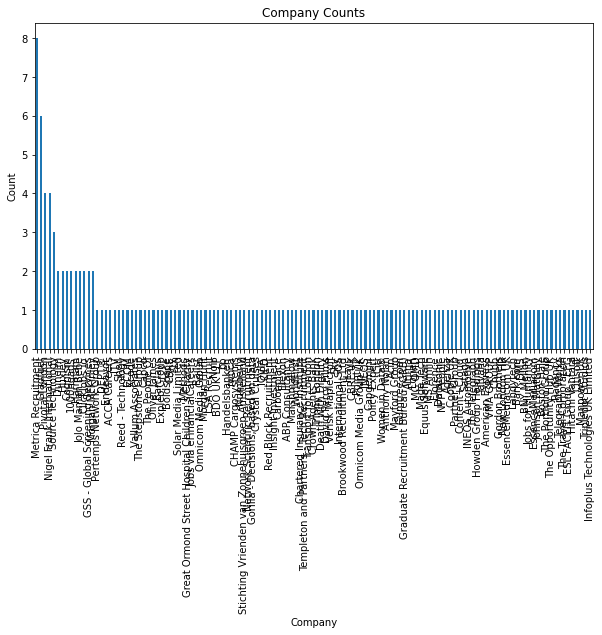

In [24]:
# Create a bar chart of the company counts
company_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Company Counts')
plt.show()

In [25]:
# Get the top 10 companies with maximum count
top_10_companies = company_counts.head(10)

In [26]:
# Display the top 10 companies
print('Top 10 Companies with Maximum Count:')
print(top_10_companies)

Top 10 Companies with Maximum Count:
Metrica Recruitment          8
Gradfuel                     6
Pivotal London               4
Nigel Frank International    4
Source Technology            3
Dunelm                       2
Huxley                       2
Cognism                      2
1000heads                    2
Harnham                      2
Name: COMPANY NAME, dtype: int64


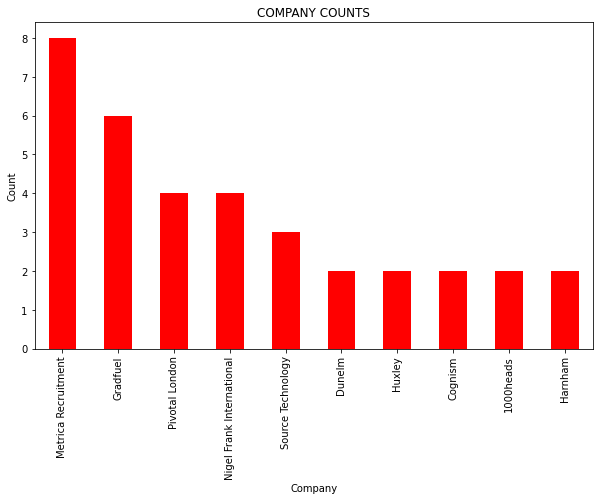

In [39]:
# Create a bar chart of the company counts
top_10_companies.plot(kind='bar', color='red', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('COMPANY COUNTS')
plt.show()


In [28]:
# Group the data by 'title' column and get the count of occurrences
title_counts = df['TITLE'].value_counts()

In [37]:
# Get the top 15 companies with maximum count
top_5_jobtitles = title_counts.head(5)

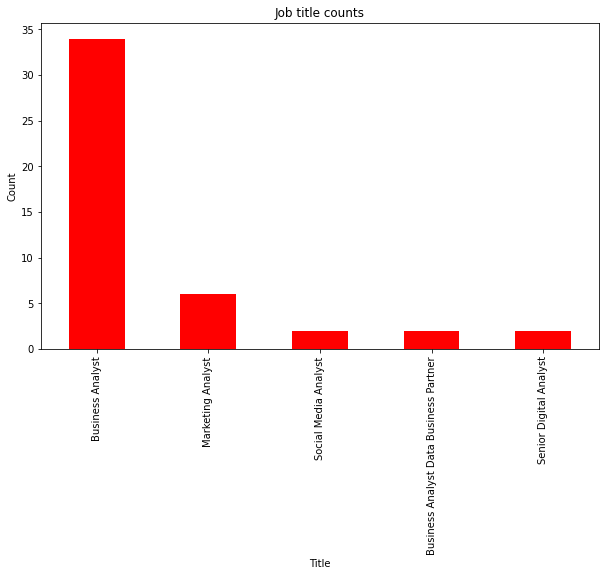

In [38]:
# Create a bar chart of the company counts
top_5_jobtitles.plot(kind='bar', color='red' , figsize=(10, 6))
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('JOB TITLE COUNTS')
plt.show()